## Environment Setup

In [1]:
#!pip install -q git+https://github.com/pymupdf/PyMuPDF.git
!pip install pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 29.4 MB/s eta 0:00:00


In [2]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.8 MB/s eta 0:00:00


In [3]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00


In [4]:
!pip install gdown

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Running Pre-trained Models for Table Detection

In [6]:
from huggingface_hub import hf_hub_download
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch
from PIL import Image, ImageDraw, ImageFont

In [7]:
file_path = hf_hub_download(repo_id="nielsr/example-pdf", repo_type="dataset", filename="example_pdf.png")
image = Image.open(file_path).convert("RGB")

In [8]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Detected table with confidence 1.0 at location [202.1, 210.59, 1119.22, 385.09]


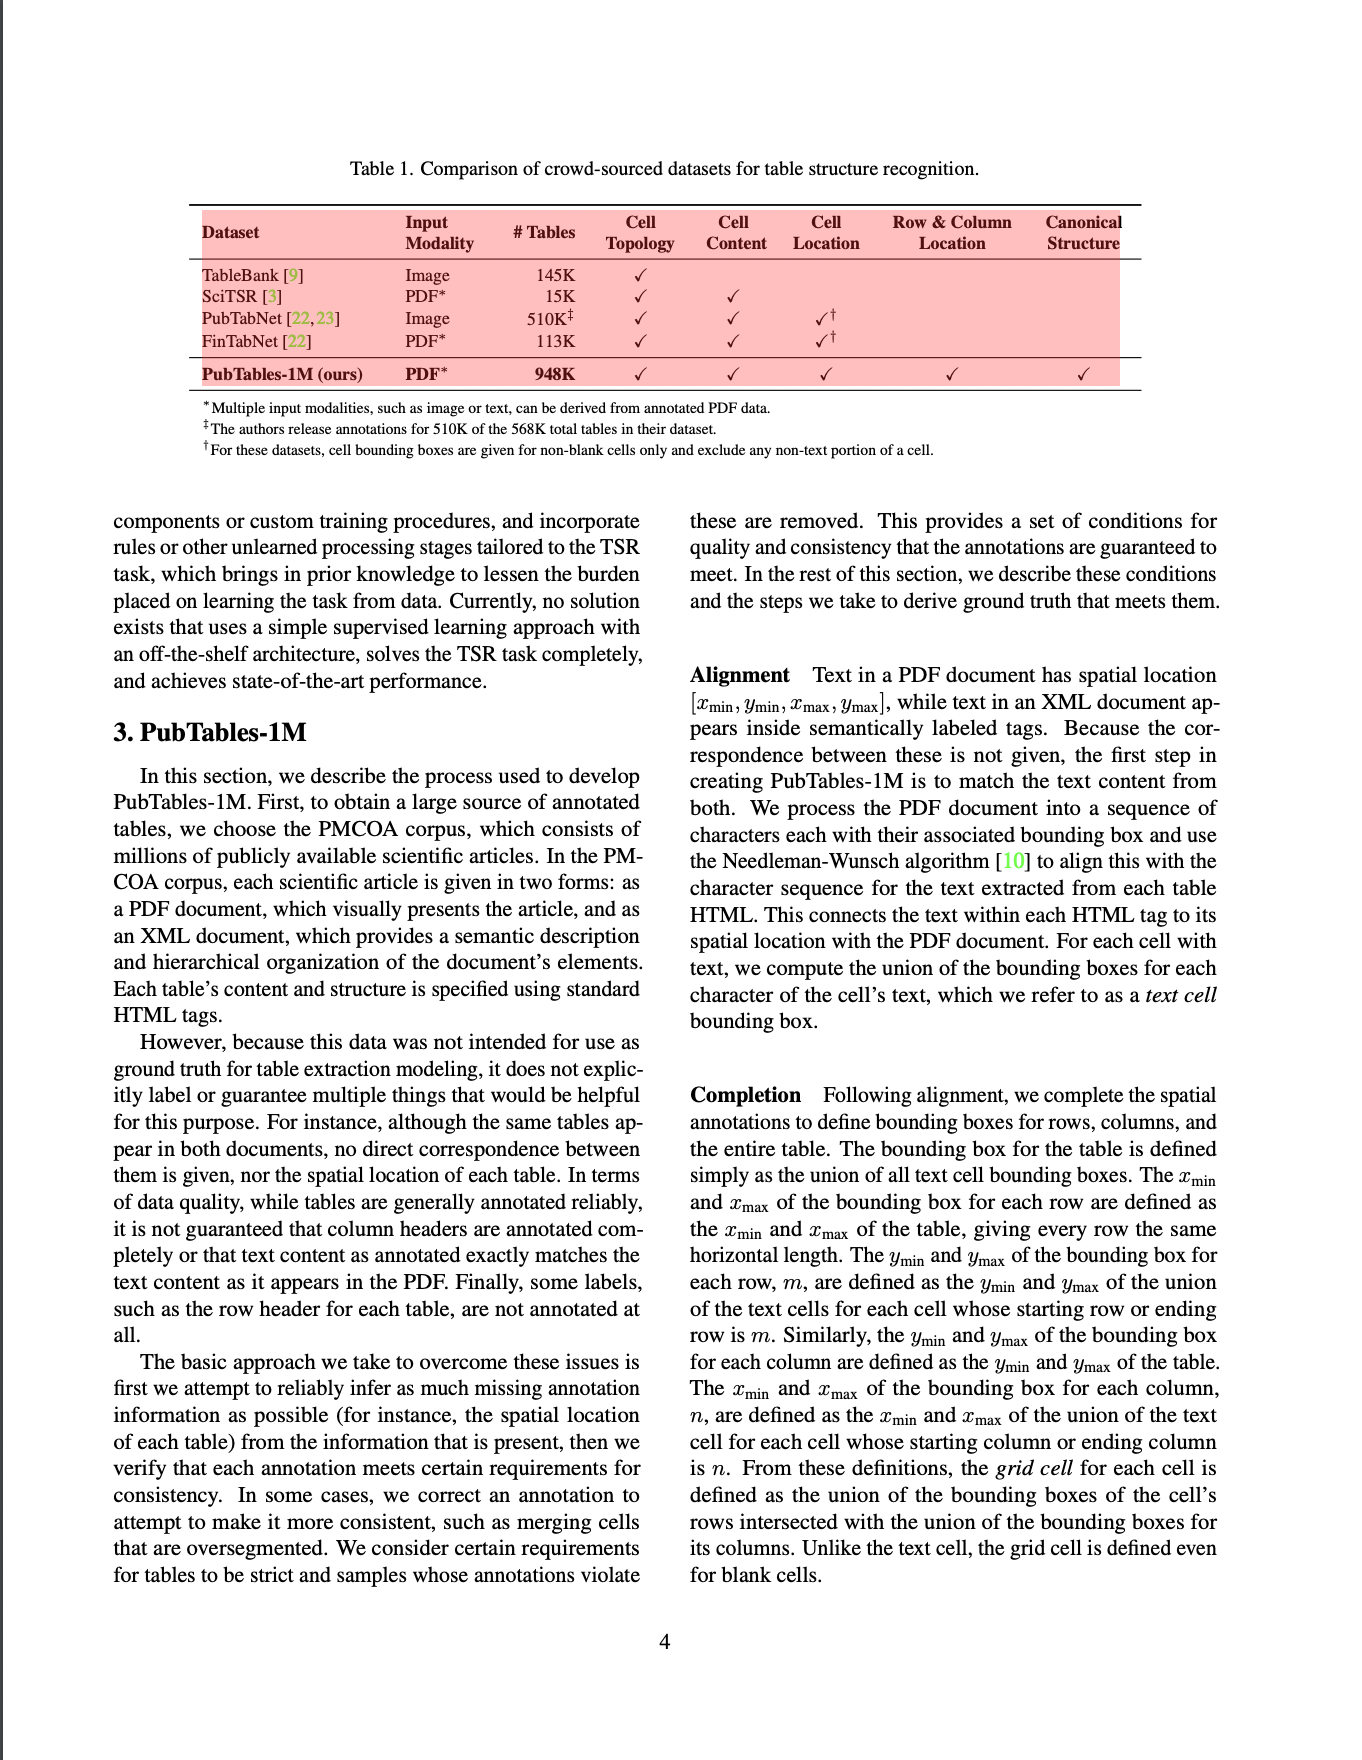

In [9]:
draw = ImageDraw.Draw(image, "RGBA")
draw.rectangle(box, fill =(255,50,50,80))
image

In [10]:
import gdown

# Replace with the file's URL
file_url = 'https://drive.google.com/file/d/1BecspbWtF_898y38sggabycfPLPy2B-Z/view?usp=drive_link'
file_id = file_url.split('/')[-2]  # Extract file ID

# Download the file using gdown
output_file = 'downloaded_file.pdf'  # Replace with desired output file name
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file)

# # Read and print a few lines from the downloaded file
# with open(output_file, 'r') as file:
#     content = file.read() first 100 characters


Downloading...
From: https://drive.google.com/uc?id=1BecspbWtF_898y38sggabycfPLPy2B-Z
To: /content/downloaded_file.pdf
100%|██████████| 17.7M/17.7M [00:00<00:00, 37.0MB/s]


'downloaded_file.pdf'

In [11]:
# import fitz  # PyMuPDF

# with open(output_file, 'rb') as f:
#     pdf_variable = f.read()

# pdf_document = fitz.open(stream=pdf_variable, filetype="pdf")

# # Display the content of the first 3 pages
# for page_number in range(min(3, pdf_document.page_count)):
#     page = pdf_document[page_number]
#     text = page.get_text()
#     print(f"Page {page_number + 1}:\n{text}\n")

# pdf_document.close()


In [13]:
!apt-get update
!apt-get install -y libgl1-mesa-glx libxkbcommon-x11-0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [983 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,136 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [860 kB]
Get:13 http://archive.ubuntu.com/ubu

In [14]:
import fitz

# pdf_file = https://drive.google.com/file/d/1BecspbWtF_898y38sggabycfPLPy2B-Z/view?usp=drive_link
def pdf_to_png(pdf_file, output_folder):
    pdf_document = fitz.open(pdf_file)

    for page_number in range(pdf_document.page_count):
        page = pdf_document[page_number]
        image = page.get_pixmap(matrix=fitz.Matrix(300/72, 300/72))

        image_path = f"{output_folder}/page_{page_number + 1}.png"
        image.save(image_path)

    pdf_document.close()

output_folder = "/content/drive/MyDrive/Dataset/Single/Extracted_image/"  # Replace with your desired output folder

# Convert PDF pages to PNG images
pdf_to_png(output_file, output_folder)


ImportError: ignored